# Protein repeat design
In this document we test additional features of the RepeatDesigner package beyond running an optimization of the protein sequence. Here we explore the presence of repeats, how these are encoded in the package, and how we give weights inside a composite scoring function.

In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from repeatdesigner import designer as rd

In [3]:
targets = [2,36,70]
repeats = [(2,34), \
           (36,68), \
          (70,102)]
tpr_des = rd.Repeat(pdb="pdbs/3atb.pdb", targets=targets, repeats=repeats)

 Generated new protein design 
 .. name : pdbs/3atb
 .. file : pdbs/3atb.pdb
 .. sequence : NSAEAWYNLGNAYYKQGDYDEAIEYYQKALELDPNNAEAWYNLGNAYYKQGDYDEAIEYYQKALELDPNNAEAWYNLGNAYYKQGDYDEAIEYYQKALELDPNNAEAKQDLGNAKQKQG
 .. target residues :  [2, 36, 70]
 .. repeats :  [(2, 34), (36, 68), (70, 102)]


In [4]:
mc_tpr = rd.Optimizer(tpr_des, beta=0.01, len_mc=2, nruns=1)

In [ ]:
mc_tpr.run_mc()

 Run #0
 I am a repeat protein!
>> Model assessment by DOPE potential
DOPE score               : -13863.834961
NSAEAWYNLGNAYYKQGDYDEAIEYYQKALELDPNNAEAWYNLGNAYYKQGDYDEAIEYYQKALELDPNNAEAWYNLGNAYYKQGDYDEAIEYYQKALELDPNNAEAKQDLGNAKQKQG
70 LYS
NSAEAWYNLGNAYYKQGDYDEAIEYYQKALELDPNNAEAWYNLGNAYYKQGDYDEAIEYYQKALELDPNNKEAWYNLGNAYYKQGDYDEAIEYYQKALELDPNNAEAKQDLGNAKQKQG
0 atoms in HETATM/BLK residues constrained
to protein atoms within 2.30 angstroms
and protein CA atoms within 10.00 angstroms
0 atoms in residues without defined topology
constrained to be rigid bodies

>> Summary of successfully produced models:
Filename                          molpdf
----------------------------------------
/var/folders/40/_89m_cn117z124qbymrrklk00000gq/T/mut_c63ALj.fasta.B99990001.pdb      673.19879

>> Model assessment by DOPE potential
DOPE score               : -13649.183594
 Initial repeat:
[Seq('AEAWYNLGNAYYKQGDYDEAIEYYQKALELDPN', Alphabet()), Seq('AEAWYNLGNAYYKQGDYDEAIEYYQKALELDPN', Alphabet()), Seq('AEAWYNL

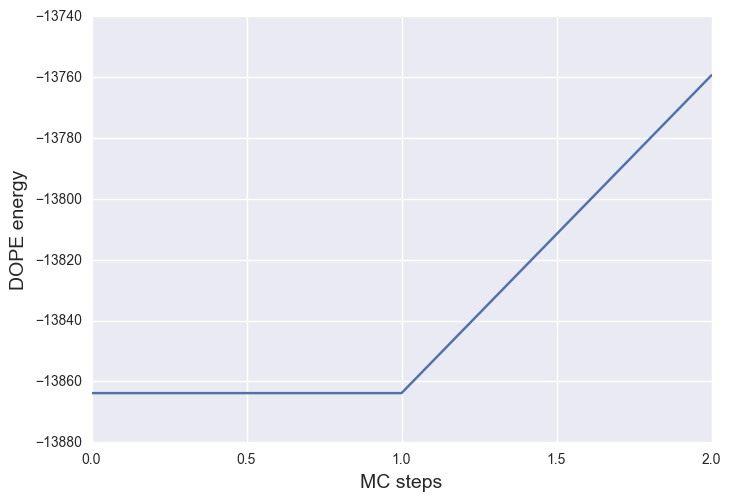

In [6]:
fig, ax = plt.subplots()
for k,v in mc_tpr.models.iteritems():
    ax.plot(v['score'])

ax.set_ylabel('DOPE energy', fontsize=14)
ax.set_xlabel('MC steps', fontsize=14)